
#Important Libs

In [1]:
!pip install minisom
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=9bcb6e28be69e9b9c3a250e7e75260ea4baf5745b7f265d830882177ef96152a
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score 
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import statsmodels.api as sm
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from minisom import MiniSom
from sklearn.pipeline import Pipeline
# allow plots to appear within the notebook
%matplotlib inline
data=pd.read_csv('Assignment3_dataset.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Splitting data

In [3]:
x=data.iloc[:,:8]
target=data["Outcome"]
X_train,y_train=data.iloc[:576,:8],target[:576]
X_test,y_test=data.iloc[576:,:8],target[576:]

In [4]:
data.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


#Visualize Correlation matrix

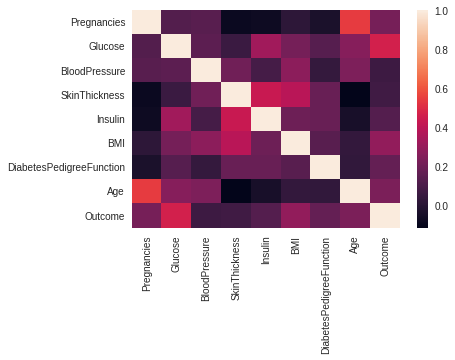

In [6]:
sns.heatmap(data.corr())

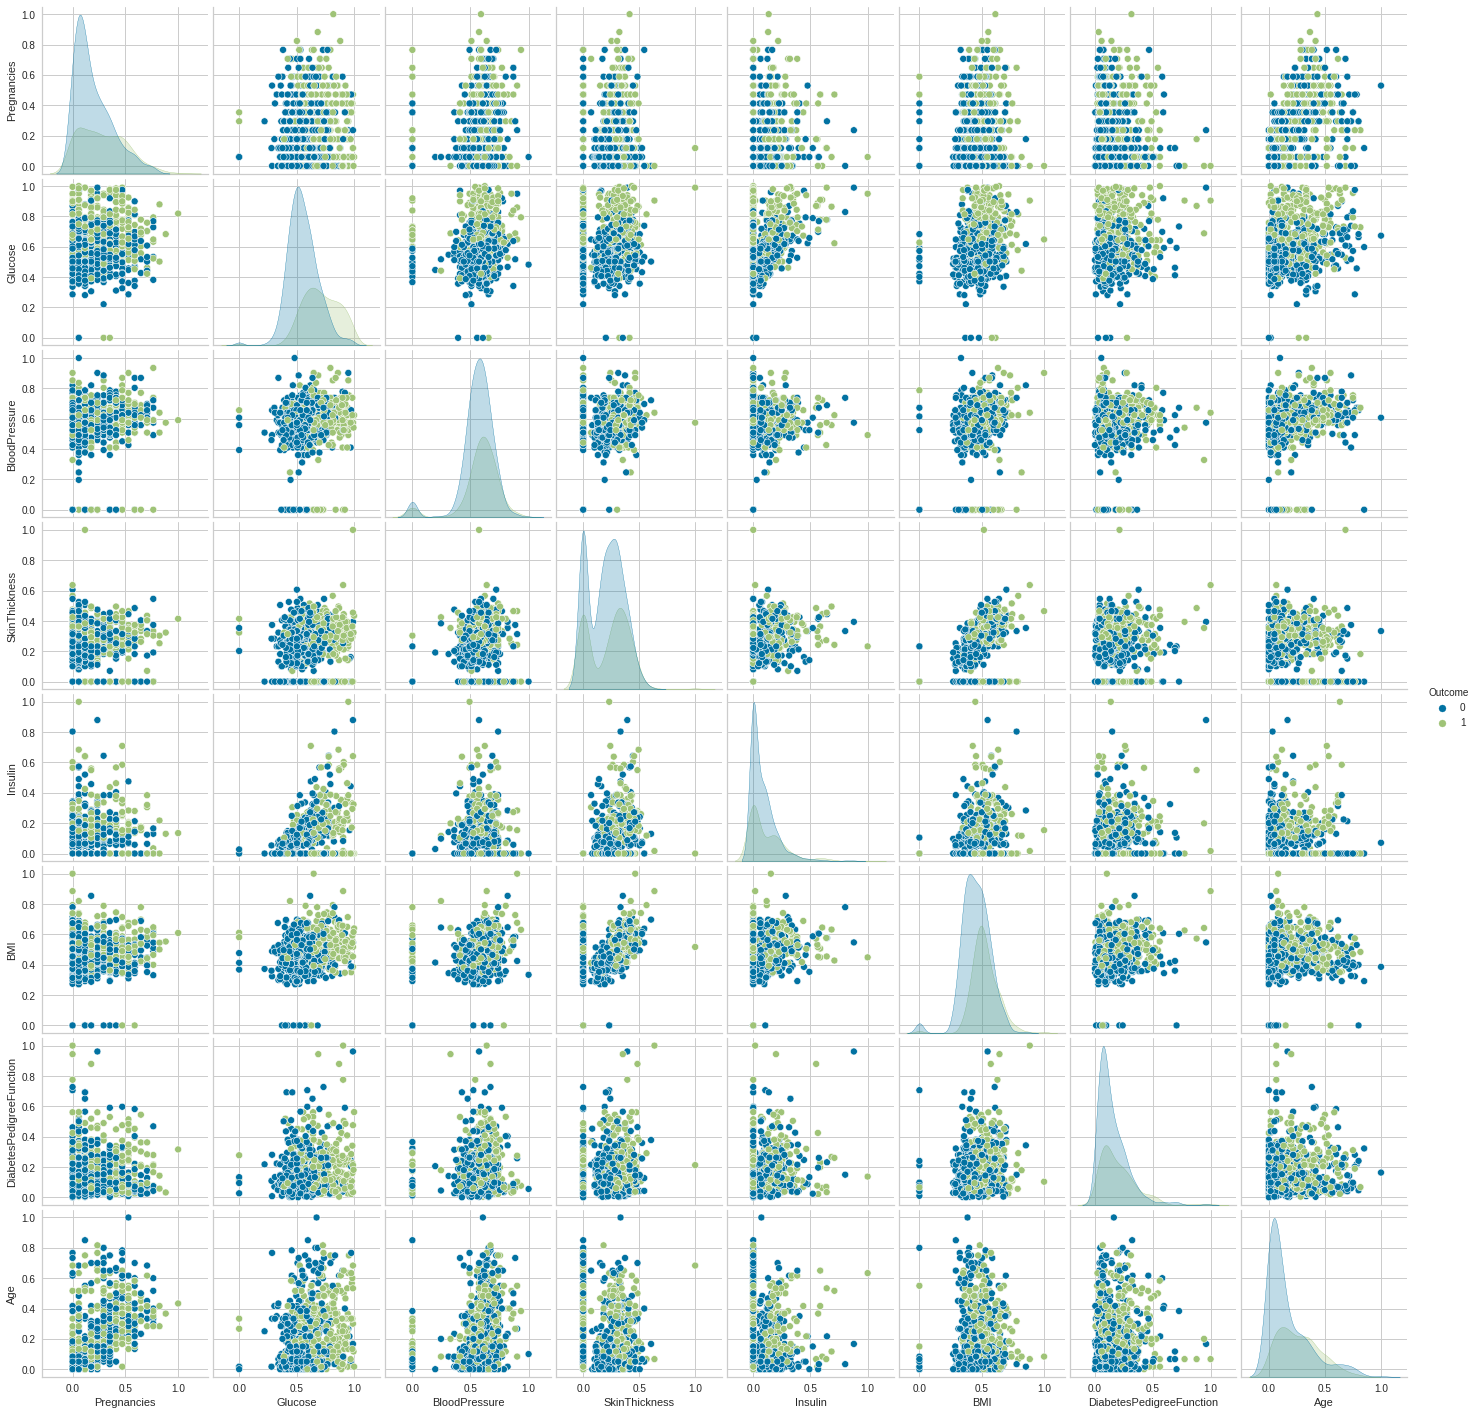

In [ ]:
sns_plot=sns.pairplot(data,hue='Outcome')

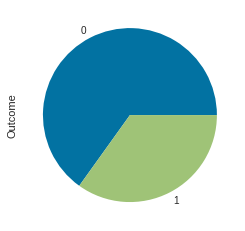

In [7]:
data['Outcome'].value_counts().plot(kind='pie')

#Helping Functions

In [143]:
def getAccuracy(model, x, y):                   
    return model.score(x,y)*100
def plot(x,y):
  data=x                              
  data_labels=y                        
  tsne = TSNE(n_components=2, random_state=0)
  X_2d = tsne.fit_transform(data) 
  classes=unique_labels(data_labels)         
  target_ids = range(len(classes))
  plt.figure(figsize=(6, 5))
  colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange' , 'tomato' , 'lime'
  for i, c, label in zip(target_ids, colors, classes):
      plt.scatter(X_2d[data_labels == i,1], X_2d[data_labels == i, 0], c=c, label=label)
  plt.xlabel('TSNE COMP1')
  plt.ylabel('TSNE COMP2')
  plt.legend()
  plt.show()
def ML(cl,xtr,xte,ytr,yte):
  cl.fit(xtr,ytr)
  trscore=getAccuracy(cl,xtr,ytr)
  tescore=getAccuracy(cl,xte,yte)
  print('Train Accuracy ={:.2f}, \
 Test score :{:.2f}\n'
         .format(trscore,tescore))
  ####send number of k and ur data to check which k depends on 3 measures 
def checknum_k(k,cluster_df):
  kmeans_1 = KMeans(n_clusters=k)
  # Use fit_predict to cluster the dataset
  predictions = kmeans_1.fit_predict(cluster_df)
  # Calculate cluster validation metrics
  score_kemans_s = silhouette_score(cluster_df, kmeans_1.labels_, metric='euclidean')
  score_kemans_c = calinski_harabasz_score(cluster_df, kmeans_1.labels_)
  print('Silhouette Score: %.4f' % score_kemans_s)
  print('Calinski Harabasz Score: %.4f' % score_kemans_c)
def Barplot(l):
  fig = plt.figure(figsize = (10, 5))
  labels = [1,2,3,4,5,6,7,8]
  times = l
  plt.bar(labels,times,width = 0.3)
  plt.title('LR&KNN')
  plt.xlabel('# Components ')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Accuracy')
  plt.show()
  ###make possible number of combinations 
def permute(s):
    result = [[s]]
    for i in range(1, len(s)):
        first = [s[:i]]
        rest = s[i:]
        for p in permute(rest):
            result.append(first + p)
    return result
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
# PCA
# Loop Function to identify number of principal components that explain atleast 85% of the variance
def explain(x):
  for comp in range(3, x.shape[1]):
      pca = PCA(n_components= comp, random_state=0)
      pca.fit(x)
      comp_check = pca.explained_variance_ratio_
      final_comp = comp
      if comp_check.sum() > 0.95:
          break
  Final_PCA = PCA(n_components= final_comp,random_state=0)
  Final_PCA.fit(x)
  cf=Final_PCA.transform(x)
  num_comps = comp_check.shape[0]
  print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))
  return cf
def FetScore(flat_list):
  featuresscore=[]
  for i in flat_list:
    xtrr=X_train[i].to_numpy()  #independent columns
    xtee=X_test[i].to_numpy()    #independent columns
    yt= y_train.to_numpy()
    ytt=y_test.to_numpy()
    knn = KNeighborsClassifier(n_neighbors=19)
    knn.fit(xtrr,yt)
    scorek=knn.score(xtee,ytt)
    LR = LogisticRegression( C = 10,random_state = 0)
    LR.fit(xtrr,yt)
    scoreLR=LR.score(xtee,ytt)
    featuresscore.append({"FeaturesKNN": i,"ScoresKNN":scorek,"FeaturesLR": i,"ScoresLR":scoreLR})
  return featuresscore

#Define Models

In [9]:
clf = LogisticRegression()
classifier= KNeighborsClassifier()

#Baseline Accuracy

In [10]:
models=[clf,classifier]
nmodel=['LR','KNN']
for i,s in zip(models,nmodel):
  print(s)
  ML(i,X_train, X_test, y_train, y_test)

LR
Train Accuracy =77.60,  Test score :77.08

KNN
Train Accuracy =82.81,  Test score :75.00



#plotting using TSNE for training &testing sets 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


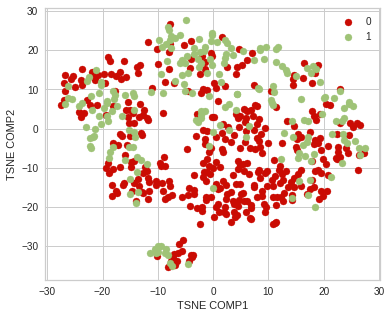

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


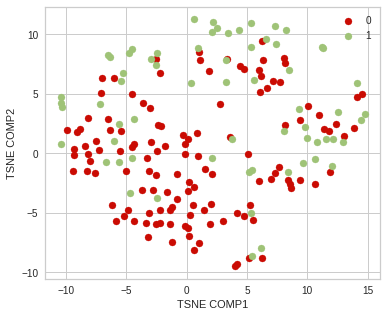

In [144]:
plot(X_train,y_train)
plot(X_test,y_test)

# identify number of principal components that explain my data

In [131]:
cluster_df=explain(x)

Using 7 components, we can explain 0.9604407466640247% of the variability in the original data.


#Different measures graphs


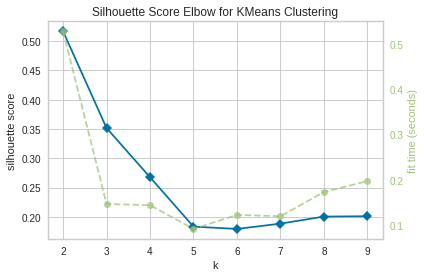

Optimal number of clusters based on silhouette score: [2]


In [20]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

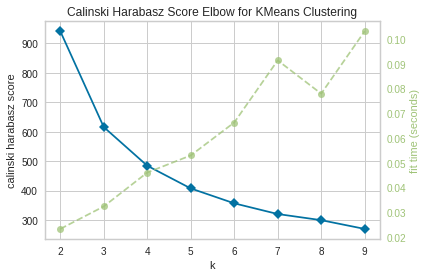

Optimal number of clusters based on calinski harabasz: [2]


In [21]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

#which k get best measures values 

In [22]:
#### Higher value of Calinski Harabasz index means the clusters are dense and well separated 
bestk=[2,3,4,5]
for i in bestk:
  print('K Value',i)
  checknum_k(i,data)

K Value 2
Silhouette Score: 0.5169
Calinski Harabasz Score: 941.3965
K Value 3
Silhouette Score: 0.3536
Calinski Harabasz Score: 615.6583
K Value 4
Silhouette Score: 0.2660
Calinski Harabasz Score: 484.2470
K Value 5
Silhouette Score: 0.1834
Calinski Harabasz Score: 407.1520


#InterClusterDistance

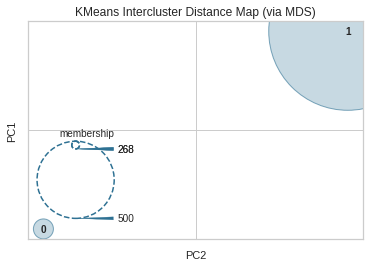

In [23]:
from yellowbrick.cluster import InterclusterDistance
kmeans_1 = KMeans(n_clusters=2)
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

#plotting clusters 

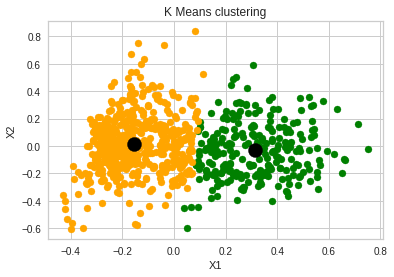

In [132]:
model = KMeans(n_clusters=2)
# predicting the clusters
pred = model.fit_predict(cluster_df)
# plotting all the clusters
colours = ['green', 'orange']
for i in np.unique(model.labels_):
  plt.scatter(cluster_df[pred==i, 0],cluster_df[pred==i, 1] , c = colours[i])
# plotting the cluster centroids
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1],
            s = 200,  # marker size
            c = 'black')
plt.title('K Means clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#KNN With PCA different (n_components)




In [29]:
components = [ 1,2, 3, 4, 5,6, 7, 8]   
scoresk=[]
for component in components:
      pca = PCA(n_components=component,random_state=0)
      pca_trdata=pca.fit_transform(X_train)
      pca_tedata=pca.transform(X_test)
      knn = KNeighborsClassifier()
      knn.fit(pca_trdata, y_train)
      ypredk=knn.predict(pca_tedata)
      scorek = accuracy_score(y_test,ypredk)
      scoresk.append(scorek*100)
      print('Components = ', component, 'Score = ', scorek*100)

Components =  1 Score =  67.1875
Components =  2 Score =  65.10416666666666
Components =  3 Score =  72.91666666666666
Components =  4 Score =  76.04166666666666
Components =  5 Score =  70.83333333333334
Components =  6 Score =  70.83333333333334
Components =  7 Score =  76.04166666666666
Components =  8 Score =  75.0


#Logistic Regression with pca different (n_components)

In [30]:
scoresr=[]
for component in components:
      pca = PCA(n_components=component,random_state=0)
      pca_trdata=pca.fit_transform(X_train)
      pca_tedata=pca.transform(X_test)
      LR = LogisticRegression(random_state=0)
      LR.fit(pca_trdata, y_train)
      ypredl=LR.predict(pca_tedata)
      scorer = accuracy_score(y_test,ypredl)
      scoresr.append(scorer*100)
      print('Components = ', component, 'Score = ', scorer*100)

Components =  1 Score =  70.83333333333334
Components =  2 Score =  70.83333333333334
Components =  3 Score =  76.04166666666666
Components =  4 Score =  76.04166666666666
Components =  5 Score =  76.04166666666666
Components =  6 Score =  75.52083333333334
Components =  7 Score =  78.64583333333334
Components =  8 Score =  77.08333333333334


#Comparing Both LR AND KNN Accuracies

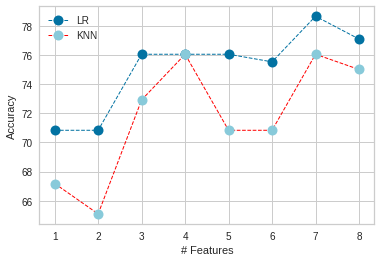

In [31]:
L=[1,2,3,4,5,6,7,8]
plt.plot(L,scoresr ,color='b', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='b', markersize=10)
plt.plot(L,scoresk ,color='red', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='c', markersize=10)
plt.xlabel('# Features')
plt.ylabel('Accuracy')
plt.legend( ['LR','KNN'])

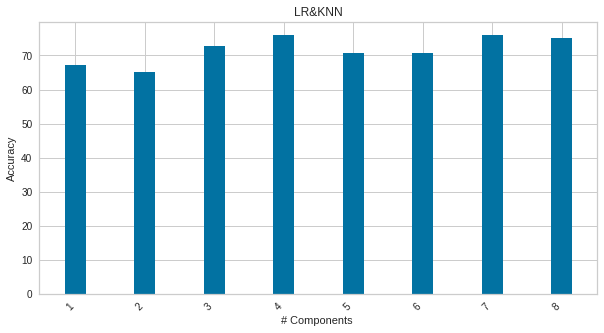

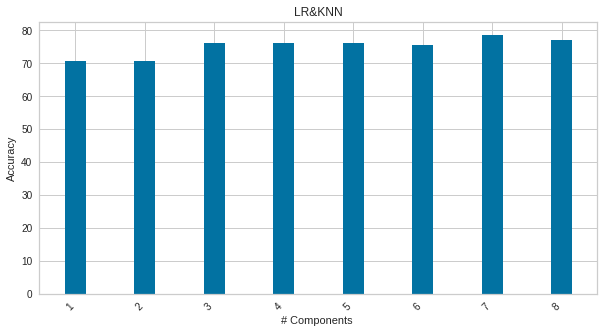

In [32]:
####KNN
Barplot(scoresk)
####LR
Barplot(scoresr)

#plotting data after applying PCA

In [137]:
pca = PCA(n_components=7)
pca_trdata=pca.fit_transform(X_train)
pca_tedata=pca.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


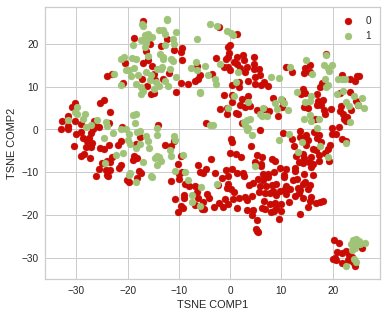

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


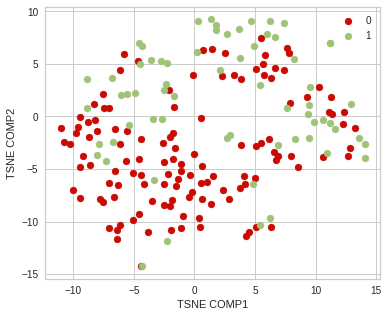

In [138]:
plot(pca_trdata,y_train)
plot(pca_tedata,y_test)

#Information Gain

DiabetesPedigreeFunction    0.013800
BloodPressure               0.020116
Insulin                     0.024691
Pregnancies                 0.029065
SkinThickness               0.037068
Age                         0.041374
BMI                         0.074246
Glucose                     0.146347
dtype: float64

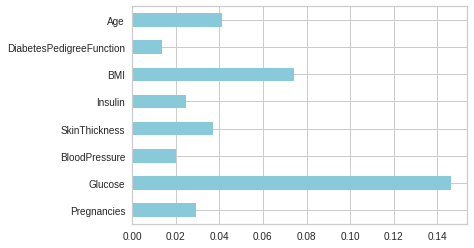

In [35]:
importance = mutual_info_classif(x,target,random_state=0)
feat_importance = pd.Series(importance, data.columns[0: len(data.columns)-1])
feat_importance.plot(kind='barh', color='c')
feat_importance.sort_values()

In [36]:
FetScore([["Glucose","SkinThickness","BMI","Age"]])

[{'FeaturesKNN': ['Glucose', 'SkinThickness', 'BMI', 'Age'],
  'FeaturesLR': ['Glucose', 'SkinThickness', 'BMI', 'Age'],
  'ScoresKNN': 0.75,
  'ScoresLR': 0.7760416666666666}]

#VarianceThreshold

In [37]:
vt=VarianceThreshold(threshold=0.025)
vt.fit(x)
vt.get_support()
vt.get_feature_names_out()

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age'],
      dtype=object)

In [38]:
FetScore([vt.get_feature_names_out()])

[{'FeaturesKNN': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age'],
        dtype=object),
  'FeaturesLR': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age'],
        dtype=object),
  'ScoresKNN': 0.765625,
  'ScoresLR': 0.7916666666666666}]

#Wrapper Methods

In [125]:
Forward = forward_selection(x,target)
SelectionSW=stepwise_selection(x,target)
print(' Forward Elimination',Forward , '\n Step Wise Selection' ,SelectionSW)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


 Forward Elimination ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure'] 
 Step Wise Selection ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']


In [136]:
FetScore([["Pregnancies","Glucose","Insulin","BMI","Age"]])

[{'FeaturesKNN': ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'],
  'FeaturesLR': ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'],
  'ScoresKNN': 0.7760416666666666,
  'ScoresLR': 0.78125}]

#find all possible combinations for the highest accuracy

In [89]:
myfeatures=["Pregnancies","Glucose",	"BloodPressure"	,"SkinThickness",	"Insulin",	"BMI","DiabetesPedigreeFunction","Age"]
ppp=[]
for p in permute(myfeatures):
  ppp.append(p)
flat_list = []
for xs in ppp:
    for a in xs:
        flat_list.append(a)

In [50]:
df1=pd.DataFrame(FetScore(flat_list))
df1=df1[~df1['FeaturesKNN'].map(tuple).duplicated()]
df1=df1.sort_values('ScoresKNN')

In [51]:
dfknn=df1[(df1['FeaturesKNN'].map(len) >2)]
dfknn=dfknn.sort_values('ScoresKNN',ascending=False)

In [52]:
x_labels = []
for i in dfknn["FeaturesKNN"]:
  news = ",".join(i)
  news += " n_of features= "+str(len(i))
  x_labels.append(news)

In [53]:
dfknn['FeaturesKNN']=x_labels

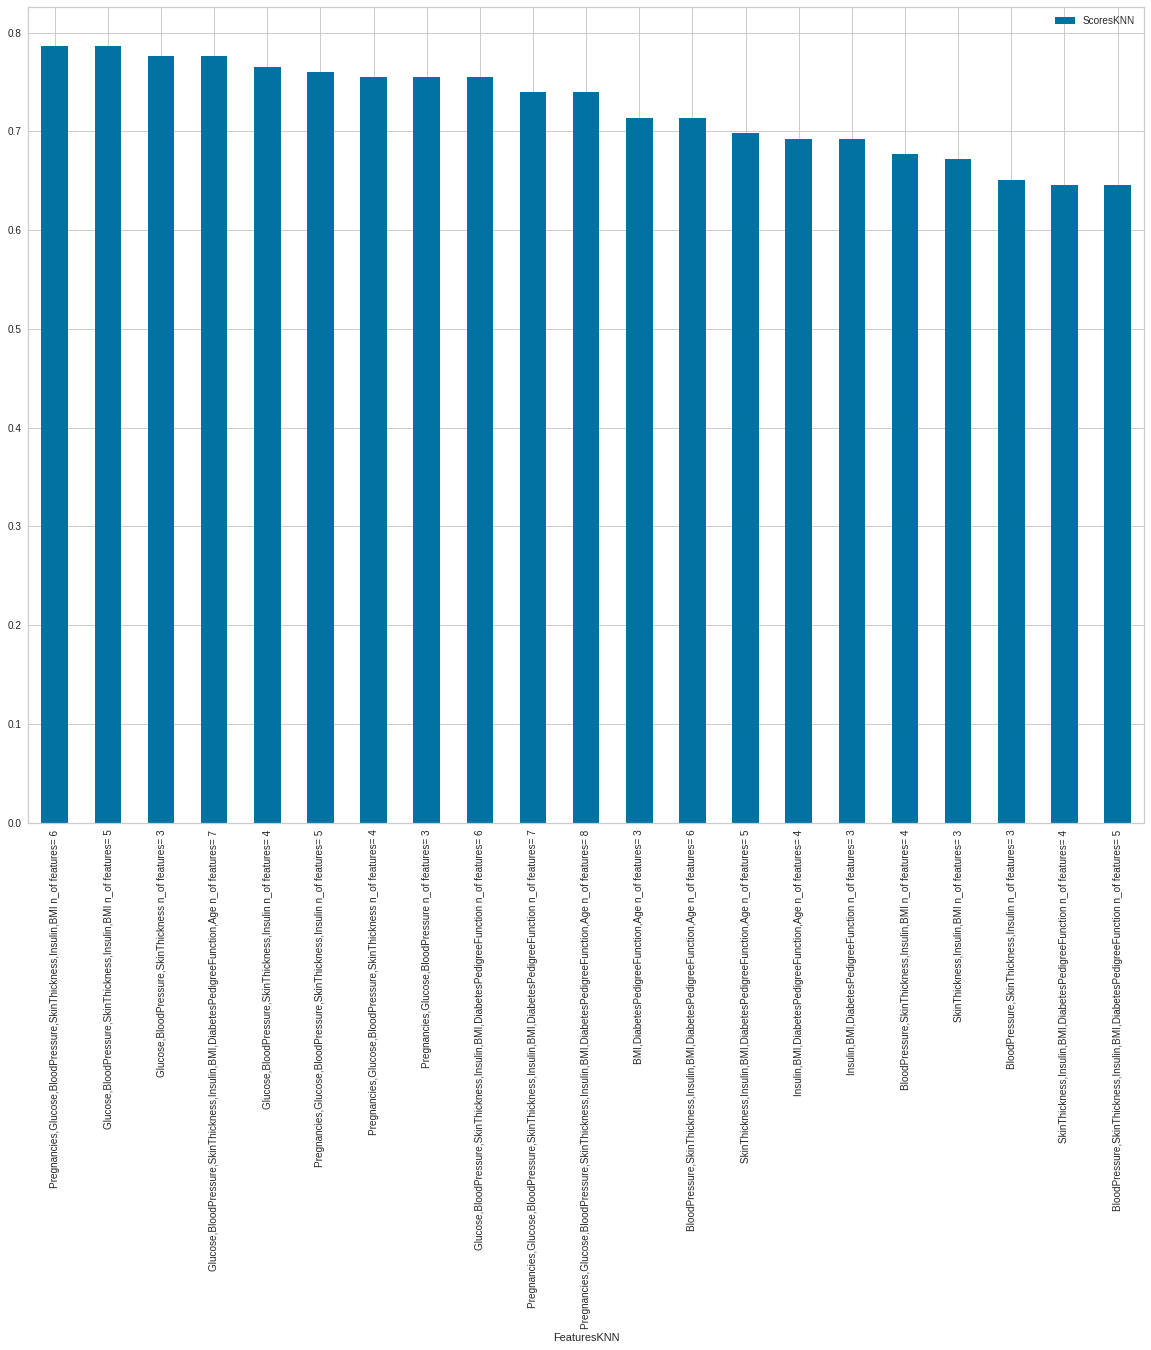

In [54]:
ax = dfknn.plot.bar(x='FeaturesKNN', y='ScoresKNN', rot=90,figsize=(20,15))
fig = ax.get_figure()

In [55]:
df1=df1[~df1['FeaturesLR'].map(tuple).duplicated()]
df1=df1.sort_values('ScoresLR')

In [56]:
dfLR=df1[(df1['FeaturesLR'].map(len) >3)]
dfLR=dfLR.sort_values('ScoresLR',ascending=False)

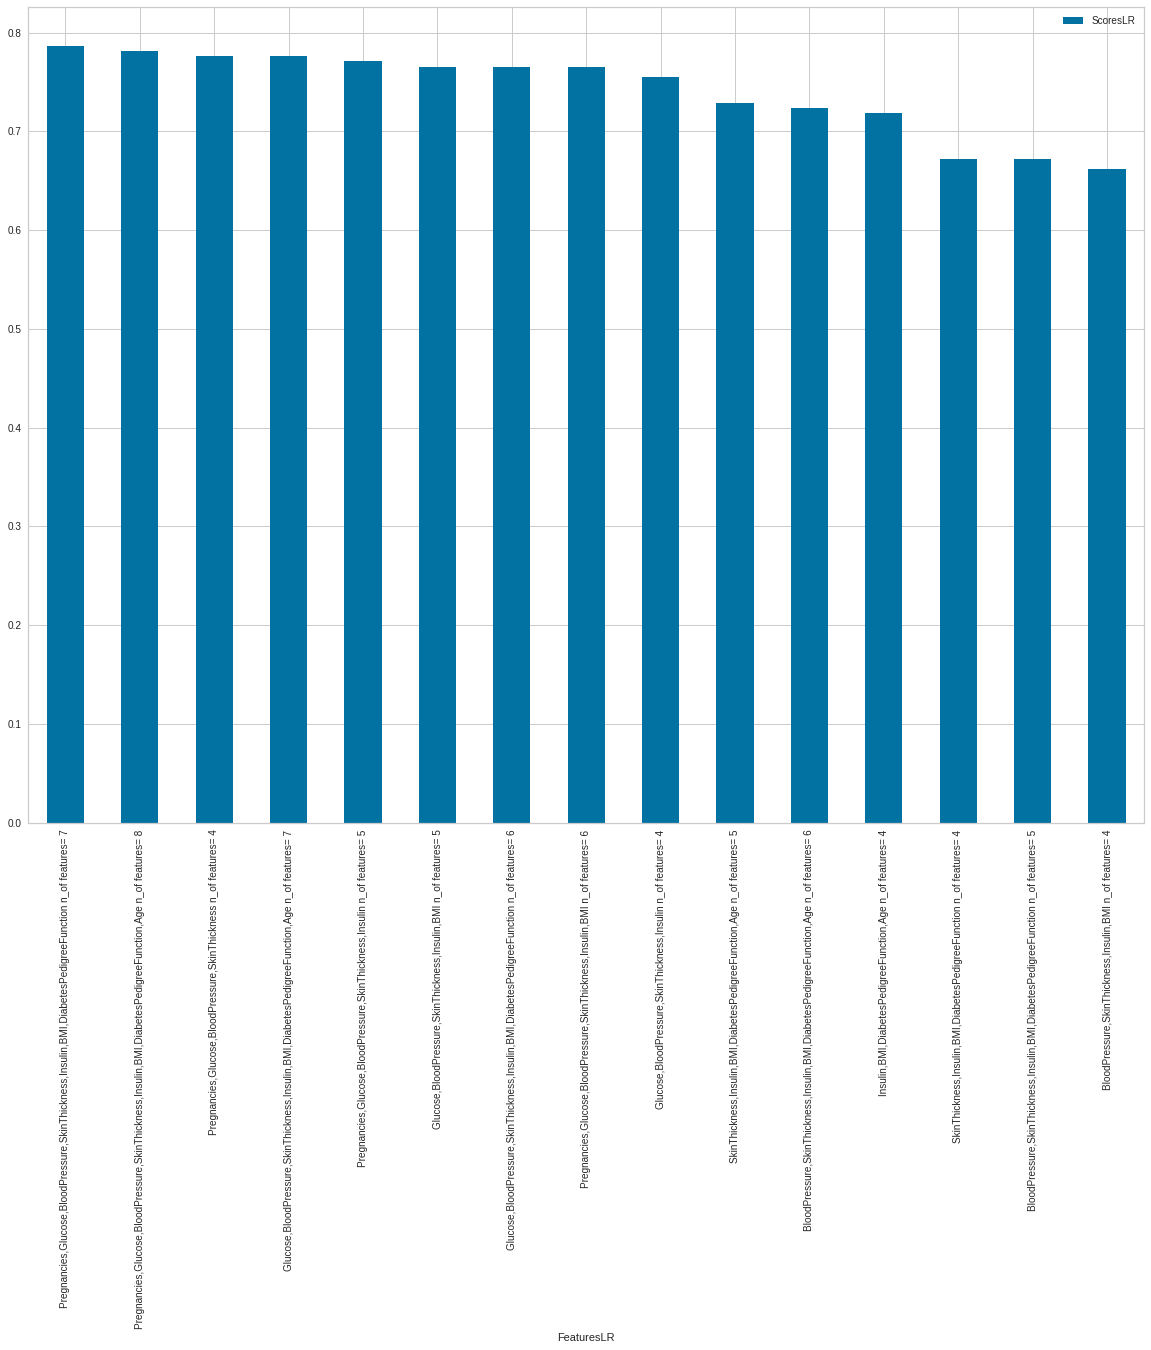

In [57]:
x_labell = []
for i in dfLR["FeaturesLR"]:
  new = ",".join(i)
  new += " n_of features= "+str(len(i))
  x_labell.append(new)
dfLR['FeaturesLR']=x_labell
ax = dfLR.plot.bar(x='FeaturesLR', y='ScoresLR', rot=90,figsize=(20,15))

#Plotting the data after elminating features 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


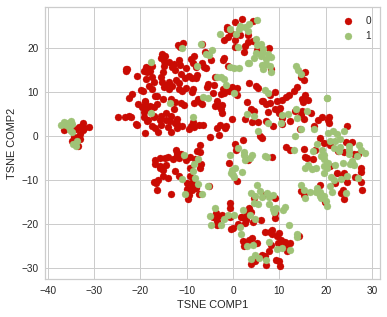

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


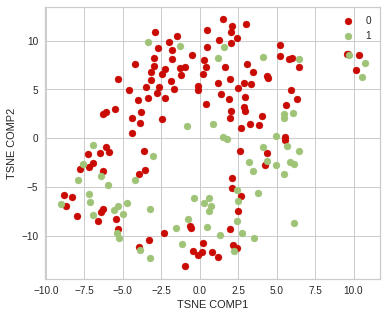

In [60]:
plot(X_train[vt.get_feature_names_out()],y_train)
plot(X_test[vt.get_feature_names_out()],y_test)

In [92]:
compare=explain(data)

Using 7 components, we can explain 0.9569475480918903% of the variability in the original data.


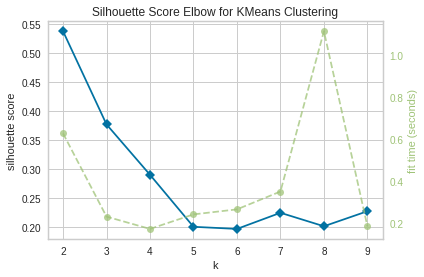

Optimal number of clusters based on silhouette score: [2]


In [93]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(compare)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

In [94]:
som_shape = (1, 2)
som = MiniSom(som_shape[0], som_shape[1], 7, sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)
initPos = np.array(som.get_weights())
som.train_batch(compare, 500, verbose=True)
finalPos = np.array(som.get_weights())
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in compare]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.4066367663893066


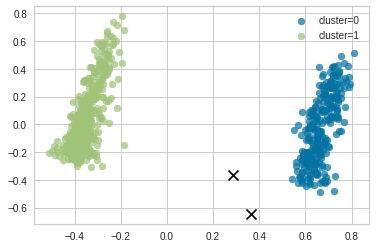

In [95]:
# plotting the clusters using the first 2 dimentions of the data
initPos=initPos.reshape(2,7)
finalPos=finalPos.reshape(2,7)
for c in np.unique(cluster_index):
    plt.scatter(compare[cluster_index == c, 0],
                compare[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
# plotting centroids
plt.scatter(initPos[:,0], initPos[:,1], marker='x', s=100, linewidths=10, color='k',)
plt.legend();
# plotting centroids


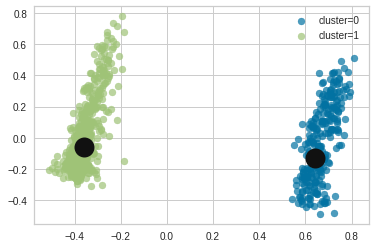

In [83]:
for c in np.unique(cluster_index):
    plt.scatter(compare[cluster_index == c, 0],
                compare[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
plt.scatter(finalPos[:,0], finalPos[:,1], marker='o', s=100, linewidths=10, color='k', )
plt.legend();

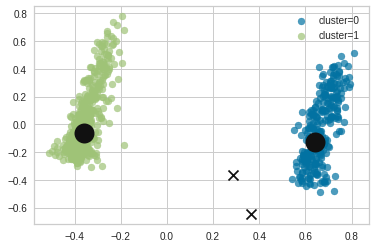

In [112]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(compare[cluster_index == c, 0],
                compare[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
# plotting centroids
plt.scatter(initPos[:,0], initPos[:,1], marker='x', s=100, linewidths=10, color='k',)
plt.legend();
# plotting centroids
plt.scatter(finalPos[:,0], finalPos[:,1], marker='o', s=100, linewidths=10, color='k', )
plt.legend();

(2, 7)


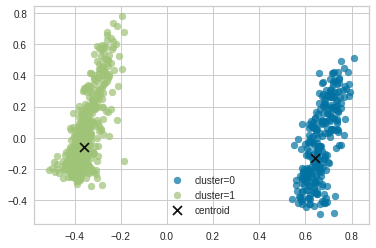

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(compare[cluster_index == c, 0],
                compare[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
# plotting centroids
for centroid in som.get_weights():
    print(centroid.shape)
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

#Plot the silhouette score vs the number of neurons (max 30 neurons)

0.537371447069829


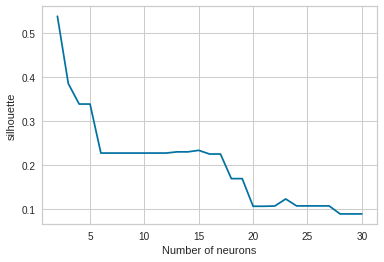

In [114]:
s = []
for i in range(2,31):
    m = MiniSom(i, 1, 7,sigma=0.1, learning_rate=.4,random_seed=0 ) 
    m.train(compare, 100) 
    preds = []
    for sample in compare :
      preds.append(m.winner(sample)[0])
    s.append(silhouette_score(compare, preds))
print(max(s))
plt.plot(range(2,31), s)
plt.xlabel('Number of neurons')
plt.ylabel('silhouette')
plt.show()

#Tune the epsilon (0.3-0.7) and minpoints (2-15) values

In [157]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN
info=pd.DataFrame()
from tqdm import tqdm
epsList, msList, accList,cluster = list(), list(), list(),list()
for eps in tqdm(np.arange(0.3, 0.7, 0.1)):
  for ms in range(2, 15):
    model = DBSCAN(eps=eps, min_samples=ms)
    predLabels = model.fit_predict(x)
    score = silhouette_score(compare, predLabels, random_state=0)
    classes=len(unique_labels(predLabels))
    epsList.append(eps)
    msList.append(ms)
    accList.append(score)
    cluster.append(classes)
epsList, msList, accList = np.array(epsList), np.array(msList), np.array(accList)

100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


In [158]:
info["epsList"]=epsList
info["msList"]=msList
info["silhouette_score"]=accList
info["cluster"]=cluster
info=info.sort_values('silhouette_score',ascending=False).head(10)
info

,epsList,msList,silhouette_score,cluster
51,0.6,14,0.340572,2
50,0.6,13,0.340572,2
49,0.6,12,0.340572,2
48,0.6,11,0.340572,2
47,0.6,10,0.340572,2
46,0.6,9,0.340572,2
31,0.5,7,0.340572,2
30,0.5,6,0.340572,2
29,0.5,5,0.340572,2
28,0.5,4,0.340572,2


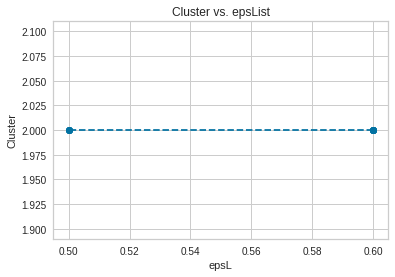

In [161]:
scores = []
centers = list(range(2,30))
plt.plot(info["epsList"],info["cluster"], linestyle='--', marker='o', color='b');
plt.xlabel('epsL');
plt.ylabel('Cluster');
plt.title('Cluster vs. epsList');

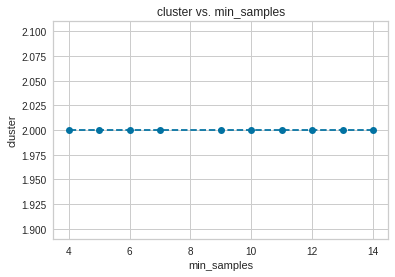

In [162]:
plt.plot(info["msList"],info["cluster"], linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('cluster');
plt.title('cluster vs. min_samples');